In [1]:
!pip install imbalanced-learn scikit-learn matplotlib seaborn --quiet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('dataset_med.csv')
df.head()

Saving dataset_med.csv to dataset_med.csv


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [4]:
# Check for missing values
print(df.isnull().sum())

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Separate features and target (change 'cancer' to your actual target column name)
X = df.drop('survived', axis=1)
y = df['survived']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64


In [6]:
model = RandomForestClassifier(
    n_estimators=20,     # fewer trees
    max_depth=6,         # shallower trees
    n_jobs=-1,           # use all cores
    random_state=42
)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


Accuracy: 0.5724831460674157

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.63      0.70    138799
           1       0.22      0.37      0.28     39201

    accuracy                           0.57    178000
   macro avg       0.50      0.50      0.49    178000
weighted avg       0.66      0.57      0.60    178000

Confusion Matrix:
 [[87327 51472]
 [24626 14575]]
ROC AUC Score: 0.501289942220315


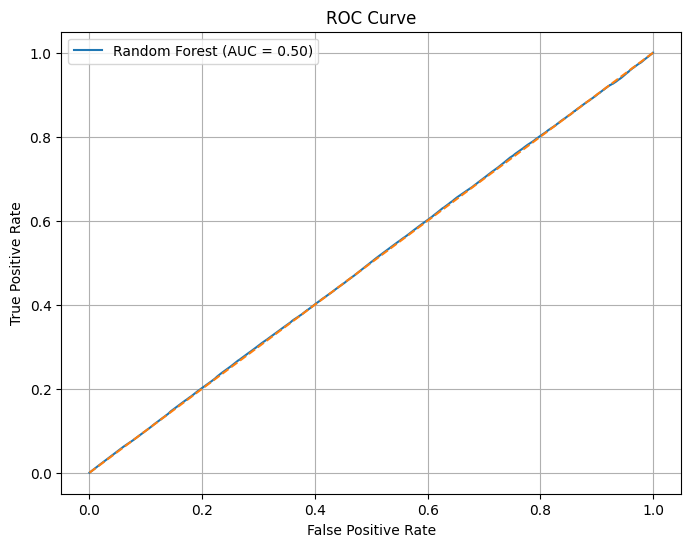

In [7]:
#Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

#Roc curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

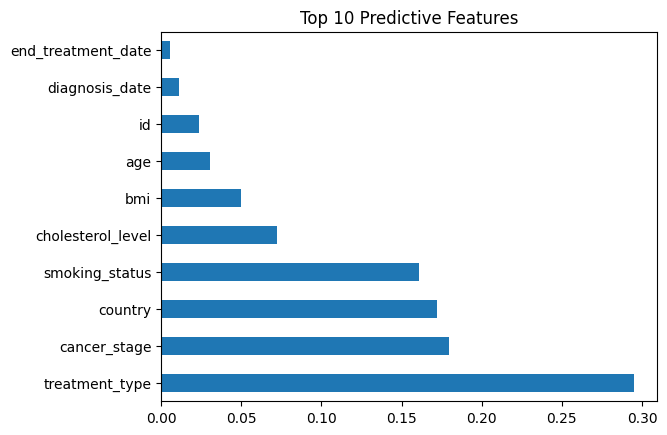

In [9]:
#Feature importance
importances = pd.Series(model.feature_importances_, index=df.drop('survived', axis=1).columns)
importances.nlargest(10).plot(kind='barh', title='Top 10 Predictive Features')
plt.show()